<a href="https://colab.research.google.com/github/liteshperumalla/litesh_perumalla_INFO5731_Spring2025/blob/main/Perumalla_Litesh_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 2**

In this assignment, you will work on gathering text data from an open data source via web scraping or API. Following this, you will need to clean the text data and perform syntactic analysis on the data. Follow the instructions carefully and design well-structured Python programs to address each question.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

* **Make sure to submit the cleaned data CSV in the comment section - 10 points**

**Total points**: 100

**Deadline**: Monday, at 11:59 PM.

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**

**Please check that the link you submitted can be opened and points to the correct assignment.**


# Question 1 (25 points)

Write a python program to collect text data from **either of the following sources** and save the data into a **csv file:**

(1) Collect all the customer reviews of a product (you can choose any porduct) on amazon. [atleast 1000 reviews]

(2) Collect the top 1000 User Reviews of a movie recently in 2023 or 2024 (you can choose any movie) from IMDB. [If one movie doesn't have sufficient reviews, collect reviews of atleast 2 or 3 movies]


(3) Collect the **abstracts** of the top 10000 research papers by using the query "machine learning", "data science", "artifical intelligence", or "information extraction" from Semantic Scholar.

(4) Collect all the information of the 904 narrators in the Densho Digital Repository.

(5)**Collect a total of 10000 reviews** of the top 100 most popular software from G2 and Capterra.


In [1]:
# Your code here
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.amazon.com/Apple-iPhone-MagSafe-Camera-Control/dp/B0DGHQQK9D/ref=sr_1_1_sspa?crid=A0BMPRWRPPO2&dib=eyJ2IjoiMSJ9.khqJo1RRIw_uAr9hSrYIa7jV7qt_caRqzGxM4m6wq4iBN348oavkmgRx1jHDo-re4ypUU95_ZKWn-3QnQviv-Y_j1_t7rbH1FTVjSMud4UDiHfMbSUcg73lx5iuwagBUNfyl9yauZ0q21S1z5PiRftt4kMnX2xVE2uE1LsLojRHSuRZB7645N2vtxTJg1ii5DwRoZWVAaFYIee9XWQCD8-wrPpJtQqXQU4k3fUWRXlY.2KnfWtbS-TS-P9qIJ-Z-wYgqADgHpqGOJDK8r3YQjig&dib_tag=se&keywords=iphone%2B16%2Bpro%2Bmax&qid=1739406254&sprefix=iphone%2B16%2Bpro%2Bmax%2Caps%2C154&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=i'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
reviews = soup.find(id = 'cm-cr-dp-review-list')
reviews_top = reviews.find_all(attrs={"data-hook": "review"})
amazon_reviews = reviews_top[0]
print(amazon_reviews.prettify())



<li class="review aok-relative" data-hook="review" id="R3PI3ZN9GA2TSO">
 <span class="a-list-item">
  <div class="a-row a-spacing-none" id="R3PI3ZN9GA2TSO-review-card">
   <div class="a-section celwidget" id="customer_review-R3PI3ZN9GA2TSO">
    <script>
     var metricsName = "DesktopCredibleBadgesInTopReviewsDetailPageCount"
    </script>
    <script>
     if(window.ue) {
        ue.count(metricsName, 0)
      }
    </script>
    <div class="a-row a-spacing-mini" data-hook="genome-widget">
     <a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AFTJ7MK42I4ZRRXOPMTML3QCSGXA">
      <div aria-hidden="true" class="a-profile-avatar-wrapper">
       <div class="a-profile-avatar">
        <img class="a-lazy-loaded" data-src="https://m.media-amazon.com/images/S/amazon-avatars-global/default.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/>
        <noscript>
         <img src="https://m.media-amazon.com/images/S/amazon-avat

In [2]:
amzn_reviews = amazon_reviews.find(class_= "a-size-base review-text").getText(strip=True)
print(amzn_reviews)

This case along with tempered glass screen and lens protectors have kept my brand new iPhone 16 Pro Max in pristine condition. MagSafe works perfectly. Just wished this case protected the camera lenses better. The design of this phone has the camera lenses protruding quite far so more of a border is required to keep it from hitting surfaces. Very easy to put on and take off. Slim profile and crystal clear for aesthetics. All buttons are easily accessible. Pricey but worth it.Read more


In [3]:
for i in range(min(100, len(reviews_top))):
    amazon_review = reviews_top[i]
    amzn_review_text = amazon_review.find(class_="a-size-base review-text").getText(strip=True)
    print(amzn_review_text)

This case along with tempered glass screen and lens protectors have kept my brand new iPhone 16 Pro Max in pristine condition. MagSafe works perfectly. Just wished this case protected the camera lenses better. The design of this phone has the camera lenses protruding quite far so more of a border is required to keep it from hitting surfaces. Very easy to put on and take off. Slim profile and crystal clear for aesthetics. All buttons are easily accessible. Pricey but worth it.Read more
I’ve tried other cases for my iPhones and they are either too stiff or the color fades over time. These cases hold up well to every day use and the silicone gives it a nice tactile feel without feeling sticky or accumulating anything.It protects the camera lenses with the raised “lip” on the back so I don’t have to worry about setting my phone down on its back. Even though the buttons are all covered (something I didn’t like on other phone cases) they are still easy to press due to the softness of the sil

In [4]:
for i in range(len(reviews_top)):
  amazon_review = reviews_top[i]
  amzn_review_text = amazon_review.find(class_="a-size-base review-text").getText(strip=True)
  print(amzn_review_text)

This case along with tempered glass screen and lens protectors have kept my brand new iPhone 16 Pro Max in pristine condition. MagSafe works perfectly. Just wished this case protected the camera lenses better. The design of this phone has the camera lenses protruding quite far so more of a border is required to keep it from hitting surfaces. Very easy to put on and take off. Slim profile and crystal clear for aesthetics. All buttons are easily accessible. Pricey but worth it.Read more
I’ve tried other cases for my iPhones and they are either too stiff or the color fades over time. These cases hold up well to every day use and the silicone gives it a nice tactile feel without feeling sticky or accumulating anything.It protects the camera lenses with the raised “lip” on the back so I don’t have to worry about setting my phone down on its back. Even though the buttons are all covered (something I didn’t like on other phone cases) they are still easy to press due to the softness of the sil

In [5]:
for i in range(min(1000, len(reviews_top))):
    amazon_review = reviews_top[i]
    amzn_review_text = amazon_review.find(class_="a-size-base review-text").getText(strip=True)
    print(amzn_review_text)

This case along with tempered glass screen and lens protectors have kept my brand new iPhone 16 Pro Max in pristine condition. MagSafe works perfectly. Just wished this case protected the camera lenses better. The design of this phone has the camera lenses protruding quite far so more of a border is required to keep it from hitting surfaces. Very easy to put on and take off. Slim profile and crystal clear for aesthetics. All buttons are easily accessible. Pricey but worth it.Read more
I’ve tried other cases for my iPhones and they are either too stiff or the color fades over time. These cases hold up well to every day use and the silicone gives it a nice tactile feel without feeling sticky or accumulating anything.It protects the camera lenses with the raised “lip” on the back so I don’t have to worry about setting my phone down on its back. Even though the buttons are all covered (something I didn’t like on other phone cases) they are still easy to press due to the softness of the sil

In [6]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd


base_url = 'https://www.amazon.com/Apple-iPhone-MagSafe-Camera-Control/dp/B0DGHQQK9D/ref=sr_1_1_sspa?crid=A0BMPRWRPPO2&dib=eyJ2IjoiMSJ9.khqJo1RRIw_uAr9hSrYIa7jV7qt_caRqzGxM4m6wq4iBN348oavkmgRx1jHDo-re4ypUU95_ZKWn-3QnQviv-Y_j1_t7rbH1FTVjSMud4UDiHfMbSUcg73lx5iuwagBUNfyl9yauZ0q21S1z5PiRftt4kMnX2xVE2uE1LsLojRHSuRZB7645N2vtxTJg1ii5DwRoZWVAaFYIee9XWQCD8-wrPpJtQqXQU4k3fUWRXlY.2KnfWtbS-TS-P9qIJ-Z-wYgqADgHpqGOJDK8r3YQjig&dib_tag=se&keywords=iphone%2B16%2Bpro%2Bmax&qid=1739406254&sprefix=iphone%2B16%2Bpro%2Bmax%2Caps%2C154&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=i&page='


total_reviews = 1000
collected_reviews = []


for page_num in range(1, (total_reviews // 10) + 2):
    url = base_url + str(page_num)
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    reviews = soup.find(id='cm-cr-dp-review-list')
    if reviews:
        reviews_top = reviews.find_all(attrs={"data-hook": "review"})
        for review in reviews_top:
            collected_reviews.append(review.prettify())
            if len(collected_reviews) >= total_reviews:
                break

    if len(collected_reviews) >= total_reviews:
        break
for review in collected_reviews[:1000]:
    print(review)




<li class="review aok-relative" data-hook="review" id="R3PI3ZN9GA2TSO">
 <span class="a-list-item">
  <div class="a-row a-spacing-none" id="R3PI3ZN9GA2TSO-review-card">
   <div class="a-section celwidget" id="customer_review-R3PI3ZN9GA2TSO">
    <script>
     var metricsName = "DesktopCredibleBadgesInTopReviewsDetailPageCount"
    </script>
    <script>
     if(window.ue) {
        ue.count(metricsName, 0)
      }
    </script>
    <div class="a-row a-spacing-mini" data-hook="genome-widget">
     <a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AFTJ7MK42I4ZRRXOPMTML3QCSGXA">
      <div aria-hidden="true" class="a-profile-avatar-wrapper">
       <div class="a-profile-avatar">
        <img class="a-lazy-loaded" data-src="https://m.media-amazon.com/images/S/amazon-avatars-global/default.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/>
        <noscript>
         <img src="https://m.media-amazon.com/images/S/amazon-avat

In [7]:
from bs4 import BeautifulSoup

azn_reviews = []
for review_html in collected_reviews:
    review_soup = BeautifulSoup(review_html, 'html.parser')
    review_element = review_soup.find(class_="a-row a-spacing-small review-data")
    if review_element:
        azn_reviews.append(review_element.getText(strip=True))


all_azn_reviews = " ".join(azn_reviews)
print(all_azn_reviews)



This case along with tempered glass screen and lens protectors have kept my brand new iPhone 16 Pro Max in pristine condition. MagSafe works perfectly. Just wished this case protected the camera lenses better. The design of this phone has the camera lenses protruding quite far so more of a border is required to keep it from hitting surfaces. Very easy to put on and take off. Slim profile and crystal clear for aesthetics. All buttons are easily accessible. Pricey but worth it.Read more I’ve tried other cases for my iPhones and they are either too stiff or the color fades over time. These cases hold up well to every day use and the silicone gives it a nice tactile feel without feeling sticky or accumulating anything.It protects the camera lenses with the raised “lip” on the back so I don’t have to worry about setting my phone down on its back. Even though the buttons are all covered (something I didn’t like on other phone cases) they are still easy to press due to the softness of the sil

In [8]:
import pandas as pd
df_reviews = pd.DataFrame(azn_reviews, columns=['Review'])
print(df_reviews.head())
df_reviews.to_csv("amazon_reviews.csv", index=False)


                                              Review
0  This case along with tempered glass screen and...
1  I’ve tried other cases for my iPhones and they...
2  Love it. Fits perfectly and is somewhat light ...
3  I think it's safe to say apple knows it's prod...
4  Love this case!! The design is sleek and makes...


# Question 2 (15 points)

Write a python program to **clean the text data** you collected in the previous question and save the clean data in a new column in the csv file. The data cleaning steps include: [Code and output is required for each part]

(1) Remove noise, such as special characters and punctuations.

(2) Remove numbers.

(3) Remove stopwords by using the stopwords list.

(4) Lowercase all texts

(5) Stemming.

(6) Lemmatization.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
file = '/content/amazon_reviews.csv'
scrap = pd.read_csv(file)
scrap.head()
scrap['word_count'] = scrap['Review'].apply(lambda x: len(str(x).split(" ")))
scrap[['Review','word_count']].head()

Review  word_count
0  This case along with tempered glass screen and...          84
1  I’ve tried other cases for my iPhones and they...         206
2  Love it. Fits perfectly and is somewhat light ...          32
3  I think it's safe to say apple knows it's prod...         210
4  Love this case!! The design is sleek and makes...          53

In [11]:
scrap['char_count'] = scrap['Review'].str.len()
scrap[['Review','char_count']].head()

Review  char_count
0  This case along with tempered glass screen and...         489
1  I’ve tried other cases for my iPhones and they...        1096
2  Love it. Fits perfectly and is somewhat light ...         190
3  I think it's safe to say apple knows it's prod...        1089
4  Love this case!! The design is sleek and makes...         269

In [12]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

scrap['avg_word'] = scrap['Review'].apply(lambda x: avg_word(x))
scrap[['Review','avg_word']].head()

Review  avg_word
0  This case along with tempered glass screen and...  4.833333
1  I’ve tried other cases for my iPhones and they...  4.325243
2  Love it. Fits perfectly and is somewhat light ...  4.968750
3  I think it's safe to say apple knows it's prod...  4.190476
4  Love this case!! The design is sleek and makes...  4.094340

In [13]:
!pip install --upgrade nltk

In [14]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

scrap['stopwords'] = scrap['Review'].apply(lambda x: len([x for x in x.split() if x in stop]))
scrap[['Review','stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Review  stopwords
0  This case along with tempered glass screen and...         27
1  I’ve tried other cases for my iPhones and they...         94
2  Love it. Fits perfectly and is somewhat light ...         11
3  I think it's safe to say apple knows it's prod...        100
4  Love this case!! The design is sleek and makes...         24

In [15]:
scrap['hastags'] = scrap['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
scrap[['Review','hastags']].head()

Review  hastags
0  This case along with tempered glass screen and...        0
1  I’ve tried other cases for my iPhones and they...        0
2  Love it. Fits perfectly and is somewhat light ...        0
3  I think it's safe to say apple knows it's prod...        0
4  Love this case!! The design is sleek and makes...        0

In [16]:
scrap['numerics'] = scrap['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
scrap[['Review','numerics']].head()

Review  numerics
0  This case along with tempered glass screen and...         1
1  I’ve tried other cases for my iPhones and they...         0
2  Love it. Fits perfectly and is somewhat light ...         0
3  I think it's safe to say apple knows it's prod...         2
4  Love this case!! The design is sleek and makes...         0

In [17]:
scrap['upper'] = scrap['Review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
scrap[['Review','upper']].head()

Review  upper
0  This case along with tempered glass screen and...      0
1  I’ve tried other cases for my iPhones and they...      4
2  Love it. Fits perfectly and is somewhat light ...      0
3  I think it's safe to say apple knows it's prod...      4
4  Love this case!! The design is sleek and makes...      0

In [18]:
#1 noise and special characters
scrap['Cleaned_Review'] = scrap['Review'].str.replace('[^\w\s]', '', regex=True)
scrap[['Review', 'Cleaned_Review']].head()


Review  \
0  This case along with tempered glass screen and...   
1  I’ve tried other cases for my iPhones and they...   
2  Love it. Fits perfectly and is somewhat light ...   
3  I think it's safe to say apple knows it's prod...   
4  Love this case!! The design is sleek and makes...   

                                      Cleaned_Review  
0  This case along with tempered glass screen and...  
1  Ive tried other cases for my iPhones and they ...  
2  Love it Fits perfectly and is somewhat light w...  
3  I think its safe to say apple knows its produc...  
4  Love this case The design is sleek and makes t...

In [19]:
#remove numbers
scrap['Cleaned_Review'] = scrap['Cleaned_Review'].str.replace('\d+', '')
scrap['Cleaned_Review'].head()

0    This case along with tempered glass screen and...
1    Ive tried other cases for my iPhones and they ...
2    Love it Fits perfectly and is somewhat light w...
3    I think its safe to say apple knows its produc...
4    Love this case The design is sleek and makes t...
Name: Cleaned_Review, dtype: object

In [20]:
#remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
scrap['Cleaned_Review'] = scrap['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
scrap['Cleaned_Review'].head()

0    This case along tempered glass screen lens pro...
1    Ive tried cases iPhones either stiff color fad...
2    Love Fits perfectly somewhat light weight Seem...
3    I think safe say apple knows products best iPh...
4    Love case The design sleek makes phone look un...
Name: Cleaned_Review, dtype: object

In [21]:
#lower case
scrap['Cleaned_Review'] = scrap['Cleaned_Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
scrap['Cleaned_Review'].head()

0    this case along tempered glass screen lens pro...
1    ive tried cases iphones either stiff color fad...
2    love fits perfectly somewhat light weight seem...
3    i think safe say apple knows products best iph...
4    love case the design sleek makes phone look un...
Name: Cleaned_Review, dtype: object

In [22]:
common= pd.Series(' '.join(scrap['Cleaned_Review']).split()).value_counts()[:10]
common

i             1717
case          1717
phone         1414
the            808
feel           606
camera         606
cases          606
one            606
protection     505
apple          505
Name: count, dtype: int64

In [23]:
common = pd.Series(' '.join(scrap['Cleaned_Review']).split()).value_counts()[:10]
common = list(common.index)
scrap['Cleaned_Review'] = scrap['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
scrap['Cleaned_Review'].head()

0    this along tempered glass screen lens protecto...
1    ive tried iphones either stiff color fades tim...
2    love fits perfectly somewhat light weight seem...
3    think safe say knows products best iphone 16 p...
4    love design sleek makes look unique high tech ...
Name: Cleaned_Review, dtype: object

In [24]:
common = pd.Series(' '.join(scrap['Cleaned_Review']).split()).value_counts()[-10:]
common

say           101
knows         101
products      101
awesome       101
right         101
box           101
snaps         101
effort        101
leaves        101
neededread    101
Name: count, dtype: int64

In [25]:
common = pd.Series(' '.join(scrap['Cleaned_Review']).split()).value_counts()[:10]
common = list(common.index)
scrap['Cleaned_Review'] = scrap['Cleaned_Review'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
scrap['Cleaned_Review'].head()

0    this along tempered glass screen lens protecto...
1    ive tried iphones either stiff color fades tim...
2    love perfectly somewhat light weight provide d...
3    think safe say knows products best iphone 16 p...
4    love design sleek makes look unique high tech ...
Name: Cleaned_Review, dtype: object

In [26]:
from textblob import TextBlob
scrap['Cleaned_Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    this along tempered glass screen lens protecto...
1    give tried phone either stiff color fades time...
2    love perfectly somewhat light weight provide u...
3    think safe say knows products best phone 16 pr...
4    love design sleek makes look unique high teach...
Name: Cleaned_Review, dtype: object

In [27]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
print(scrap['Cleaned_Review'][1])
TextBlob(scrap['Cleaned_Review'][1]).words


ive tried iphones either stiff color fades time these hold well every day use silicone gives nice tactile without feeling sticky accumulating anythingit protects raised lip back worry setting back even though buttons covered something didnt press due softness silicone well put remove need snug protects sidesthe complaint make many colors gray niceif youre looking nice looking slippery hands protects screen scratches raised edge touch surface sitting definitely great option little pricey expensive options thereread


WordList(['ive', 'tried', 'iphones', 'either', 'stiff', 'color', 'fades', 'time', 'these', 'hold', 'well', 'every', 'day', 'use', 'silicone', 'gives', 'nice', 'tactile', 'without', 'feeling', 'sticky', 'accumulating', 'anythingit', 'protects', 'raised', 'lip', 'back', 'worry', 'setting', 'back', 'even', 'though', 'buttons', 'covered', 'something', 'didnt', 'press', 'due', 'softness', 'silicone', 'well', 'put', 'remove', 'need', 'snug', 'protects', 'sidesthe', 'complaint', 'make', 'many', 'colors', 'gray', 'niceif', 'youre', 'looking', 'nice', 'looking', 'slippery', 'hands', 'protects', 'screen', 'scratches', 'raised', 'edge', 'touch', 'surface', 'sitting', 'definitely', 'great', 'option', 'little', 'pricey', 'expensive', 'options', 'thereread'])

In [29]:
from nltk.stem import PorterStemmer
stem = PorterStemmer()
scrap['Cleaned_Review'][:5].apply(lambda x: " ".join([stem.stem(word) for word in x.split()]))

0    thi along temper glass screen len protector ke...
1    ive tri iphon either stiff color fade time the...
2    love perfectli somewhat light weight provid du...
3    think safe say know product best iphon 16 pro ...
4    love design sleek make look uniqu high tech ha...
Name: Cleaned_Review, dtype: object

In [30]:
from textblob import Word
import nltk
nltk.download('wordnet')

scrap['Cleaned_Review'] = scrap['Cleaned_Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
scrap['Cleaned_Review'].head()
scrap.to_csv("amazon_reviews_cleaned.csv", index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Question 3 (15 points)

Write a python program to **conduct syntax and structure analysis of the clean text** you just saved above. The syntax and structure analysis includes:

(1) **Parts of Speech (POS) Tagging:** Tag Parts of Speech of each word in the text, and calculate the total number of N(oun), V(erb), Adj(ective), Adv(erb), respectively.

(2) **Constituency Parsing and Dependency Parsing:** print out the constituency parsing trees and dependency parsing trees of all the sentences. Using one sentence as an example to explain your understanding about the constituency parsing tree and dependency parsing tree.

(3) **Named Entity Recognition:** Extract all the entities such as person names, organizations, locations, product names, and date from the clean texts, calculate the count of each entity.

In [31]:
import pandas as pd
import spacy
from collections import Counter


nlp = spacy.load("en_core_web_sm")


pos_counts = Counter()


for review in scrap["Cleaned_Review"].dropna():
    doc = nlp(review)
    for token in doc:
        if token.pos_ in ["NOUN", "VERB", "ADJ", "ADV"]:
            pos_counts[token.pos_] += 1


print("Total POS counts:")
print(f"Nouns (N): {pos_counts['NOUN']}")
print(f"Verbs (V): {pos_counts['VERB']}")
print(f"Adjectives (Adj): {pos_counts['ADJ']}")
print(f"Adverbs (Adv): {pos_counts['ADV']}")


pos = pd.DataFrame(pos_counts.items(), columns=["POS_Tag", "Count"])
pos


Total POS counts:
Nouns (N): 13130
Verbs (V): 7878
Adjectives (Adj): 8080
Adverbs (Adv): 3333


POS_Tag  Count
0     ADV   3333
1    VERB   7878
2    NOUN  13130
3     ADJ   8080

In [32]:
!pip install stanza spacy benepar
!python -m spacy download en_core_web_sm


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 27.6 MB/s eta 0:00:00
  Cr

In [ ]:
# Your code here
import pandas as pd
import spacy
import nltk
from nltk import CFG
from spacy import displacy
from nltk.tree import Tree
nlp = spacy.load("en_core_web_sm")

def parse_sentences_and_print_trees(text):
    doc = nlp(text)
    for sentence in doc.sents:
        print("Dependency Parsing Tree:")
        displacy.serve(sentence, style="dep")
        print(f"Sentence: {sentence.text}")
        for token in sentence:
            print(f"Word: {token.text}, Dep: {token.dep_}, Head: {token.head.text}")
        print("\nConstituency Parsing Tree:")
        try:
            words = sentence.text.split()
            grammar = CFG.fromstring("""
            S -> NP VP
            VP -> V NP
            NP -> Det N
            V -> "run"
            N -> "dog" | "cat"
            Det -> "a" | "the"
            """)
            parser = nltk.ChartParser(grammar)
            for tree in parser.parse(words):
                tree.pretty_print()
        except Exception as e:
            print(f"Error in constituency parsing: {e}")
for abstract in scrap["Cleaned_Review"].dropna():
    parse_sentences_and_print_trees(abstract)




Dependency Parsing Tree:


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: this along tempered glass screen lens protector kept brand new iphone 16 pro max pristine condition magsafe work perfectly just wished protected better design protruding quite far border required keep hitting surface very put take slim profile crystal clear aesthetic all button easily accessible pricey worth itread
Word: this, Dep: nsubj, Head: kept
Word: along, Dep: prep, Head: this
Word: tempered, Dep: amod, Head: screen
Word: glass, Dep: compound, Head: screen
Word: screen, Dep: compound, Head: lens
Word: lens, Dep: compound, Head: protector
Word: protector, Dep: pobj, Head: along
Word: kept, Dep: ROOT, Head: kept
Word: brand, Dep: nmod, Head: magsafe
Word: new, Dep: amod, Head: magsafe
Word: iphone, Dep: nmod, Head: magsafe
Word: 16, Dep: nummod, Head: iphone
Word: pro, Dep: amod, Head: max
Word: max, Dep: amod, Head: magsafe
Word: pristine, Dep: amod, Head: condition
Word: 


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: ive tried iphones either stiff color fade time these hold well every day use silicone give nice tactile without feeling sticky accumulating anythingit protects raised lip back worry setting back even though button covered something didnt press due softness silicone well put remove need snug protects sidesthe complaint make many color gray niceif youre looking nice looking slippery hand protects screen scratch raised edge touch surface sitting definitely great option little pricey expensive option thereread
Word: i, Dep: nsubj, Head: tried
Word: ve, Dep: aux, Head: tried
Word: tried, Dep: ROOT, Head: tried
Word: iphones, Dep: dobj, Head: tried
Word: either, Dep: det, Head: time
Word: stiff, Dep: amod, Head: time
Word: color, Dep: compound, Head: fade
Word: fade, Dep: compound, Head: time
Word: time, Dep: npadvmod, Head: tried
Word: these, Dep: nsubj, Head: hold
Word: hold, Dep: r


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: love perfectly somewhat light weight provide durable let slip easily grip whatever sitting onread
Word: love, Dep: ROOT, Head: love
Word: perfectly, Dep: advmod, Head: light
Word: somewhat, Dep: advmod, Head: light
Word: light, Dep: amod, Head: weight
Word: weight, Dep: nsubj, Head: provide
Word: provide, Dep: ccomp, Head: love
Word: durable, Dep: amod, Head: let
Word: let, Dep: compound, Head: slip
Word: slip, Dep: compound, Head: grip
Word: easily, Dep: advmod, Head: grip
Word: grip, Dep: dobj, Head: provide
Word: whatever, Dep: nsubj, Head: sitting
Word: sitting, Dep: advcl, Head: grip
Word: onread, Dep: advmod, Head: sitting

Constituency Parsing Tree:
Error in constituency parsing: Grammar does not cover some of the input words: "'love', 'perfectly', 'somewhat', 'light', 'weight', 'provide', 'durable', 'let', 'slip', 'easily', 'grip', 'whatever', 'sitting', 'onread'".
Depen


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: think safe say know product best iphone 16 pro max awesome right box snap little effort leaf essentially close going get original form factor protective offer comfortable fit hand giving much better grip day day use magsafe feature continues work perfectly noticeable downgrade magnet ability grab secure gadget offer full use control button well cut out alot market brand clean leave finger print smudge come variety different color option gave four five far go think provides expensive option market 100 percent satisfied purchase decision absolutely issue caseread
Word: think, Dep: ROOT, Head: think
Word: safe, Dep: acomp, Head: think
Word: say, Dep: aux, Head: know
Word: know, Dep: ccomp, Head: think
Word: product, Dep: dobj, Head: know
Word: best, Dep: advmod, Head: snap
Word: iphone, Dep: nmod, Head: box
Word: 16, Dep: nummod, Head: iphone
Word: pro, Dep: nmod, Head: max
Word: m


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: love design sleek make look unique high tech have dropped time since putting scratch scuff may scratch little due leather niceread
Word: love, Dep: compound, Head: design
Word: design, Dep: compound, Head: sleek
Word: sleek, Dep: nsubj, Head: make
Word: make, Dep: ROOT, Head: make
Word: look, Dep: ccomp, Head: make
Word: unique, Dep: amod, Head: tech
Word: high, Dep: amod, Head: tech
Word: tech, Dep: nsubj, Head: dropped
Word: have, Dep: aux, Head: dropped
Word: dropped, Dep: ccomp, Head: make
Word: time, Dep: npadvmod, Head: dropped
Word: since, Dep: prep, Head: dropped
Word: putting, Dep: pcomp, Head: since
Word: scratch, Dep: compound, Head: scuff
Word: scuff, Dep: dobj, Head: putting
Word: may, Dep: aux, Head: scratch
Word: scratch, Dep: ccomp, Head: make
Word: little, Dep: amod, Head: leather
Word: due, Dep: amod, Head: leather
Word: leather, Dep: dobj, Head: scratch
Word: 


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: always buy least whenever purchase new iphone microfiber insert coupled perfect thickness rubber coating outside most silicone ever slightly thick bulky also capture button enclosed completely there enormous cutout side pricey always seem hold now would make leather lolread
Word: always, Dep: advmod, Head: buy
Word: buy, Dep: ROOT, Head: buy
Word: least, Dep: advmod, Head: buy
Word: whenever, Dep: advmod, Head: purchase
Word: purchase, Dep: advcl, Head: buy
Word: new, Dep: amod, Head: insert
Word: iphone, Dep: compound, Head: microfiber
Word: microfiber, Dep: compound, Head: insert
Word: insert, Dep: dobj, Head: purchase
Word: coupled, Dep: acl, Head: insert
Word: perfect, Dep: amod, Head: thickness
Word: thickness, Dep: compound, Head: coating
Word: rubber, Dep: compound, Head: coating
Word: coating, Dep: dobj, Head: purchase
Word: outside, Dep: prep, Head: coating
Word: most, 


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: best color oem caseslim good fit design without button cut outnot strong drop 5ft ok leave permanent markgood magsafe strength charging designed high price point limited took star offread
Word: best, Dep: amod, Head: color
Word: color, Dep: nmod, Head: design
Word: oem, Dep: appos, Head: color
Word: caseslim, Dep: nmod, Head: design
Word: good, Dep: amod, Head: design
Word: fit, Dep: amod, Head: design
Word: design, Dep: nsubj, Head: leave
Word: without, Dep: prep, Head: design
Word: button, Dep: compound, Head: cut
Word: cut, Dep: compound, Head: outnot
Word: outnot, Dep: pobj, Head: without
Word: strong, Dep: amod, Head: drop
Word: drop, Dep: npadvmod, Head: design
Word: 5, Dep: nummod, Head: drop
Word: ft, Dep: nsubj, Head: leave
Word: ok, Dep: nsubj, Head: leave
Word: leave, Dep: ROOT, Head: leave
Word: permanent, Dep: amod, Head: strength
Word: markgood, Dep: compound, Head


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: shopped week two good invested 16 pro max wasam nervous protecting aint cheap this paramilitary type cover seem absolute minimum protecting camera screen optimized describe keep profile possible protect it large large keeping big and biggest sell point rubberygrippery it keep inhand know incidental accidental drop happen havent dropped yet im bit nervous ive read enough review comfortable doe great keep possible inside cushy hope whats neededread
Word: shopped, Dep: amod, Head: week
Word: week, Dep: npadvmod, Head: invested
Word: two, Dep: nummod, Head: week
Word: good, Dep: amod, Head: two
Word: invested, Dep: ccomp, Head: ai
Word: 16, Dep: nummod, Head: wasam
Word: pro, Dep: amod, Head: max
Word: max, Dep: compound, Head: wasam
Word: wasam, Dep: dobj, Head: invested
Word: nervous, Dep: amod, Head: protecting
Word: protecting, Dep: nsubj, Head: ai
Word: ai, Dep: advcl, Head: se


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: this along tempered glass screen lens protector kept brand new iphone 16 pro max pristine condition magsafe work perfectly just wished protected better design protruding quite far border required keep hitting surface very put take slim profile crystal clear aesthetic all button easily accessible pricey worth itread
Word: this, Dep: nsubj, Head: kept
Word: along, Dep: prep, Head: this
Word: tempered, Dep: amod, Head: screen
Word: glass, Dep: compound, Head: screen
Word: screen, Dep: compound, Head: lens
Word: lens, Dep: compound, Head: protector
Word: protector, Dep: pobj, Head: along
Word: kept, Dep: ROOT, Head: kept
Word: brand, Dep: nmod, Head: magsafe
Word: new, Dep: amod, Head: magsafe
Word: iphone, Dep: nmod, Head: magsafe
Word: 16, Dep: nummod, Head: iphone
Word: pro, Dep: amod, Head: max
Word: max, Dep: amod, Head: magsafe
Word: pristine, Dep: amod, Head: condition
Word: 


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.
Sentence: ive tried iphones either stiff color fade time these hold well every day use silicone give nice tactile without feeling sticky accumulating anythingit protects raised lip back worry setting back even though button covered something didnt press due softness silicone well put remove need snug protects sidesthe complaint make many color gray niceif youre looking nice looking slippery hand protects screen scratch raised edge touch surface sitting definitely great option little pricey expensive option thereread
Word: i, Dep: nsubj, Head: tried
Word: ve, Dep: aux, Head: tried
Word: tried, Dep: ROOT, Head: tried
Word: iphones, Dep: dobj, Head: tried
Word: either, Dep: det, Head: time
Word: stiff, Dep: amod, Head: time
Word: color, Dep: compound, Head: fade
Word: fade, Dep: compound, Head: time
Word: time, Dep: npadvmod, Head: tried
Word: these, Dep: nsubj, Head: hold
Word: hold, Dep: r


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



[nltk_data] Downloading package benepar_en3 to /root/nltk_data...
[nltk_data]   Unzipping models/benepar_en3.zip.
/usr/local/lib/python3.11/dist-packages/benepar/parse_chart.py:169: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub 

Review: ive tried iphones either stiff color fade time these hold well every day use silicone give nice tactile without feeling sticky accumulating anythingit protects raised lip back worry setting back even though button covered something didnt press due softness silicone well put remove need snug protects sidesthe complaint make many color gray niceif youre looking nice looking slippery hand protects screen scratch raised edge touch surface sitting definitely great option little pricey expensive option thereread

Dependency Parsing Tree:
i --(nsubj)--> tried
ve --(aux)--> tried
tried --(ROOT)--> tried
iphones --(dobj)--> tried
either --(det)--> time
stiff --(amod)--> time
color --(compound)--> fade
fade --(compound)--> time
time --(npadvmod)--> tried
these --(nsubj)--> hold
hold --(relcl)--> time
well --(advmod)--> hold
every --(det)--> day
day --(npadvmod)--> give
use --(compound)--> silicone
silicone --(nsubj)--> give
give --(dep)--> tried
nice --(amod)--> tactile
tactile --(dobj)-

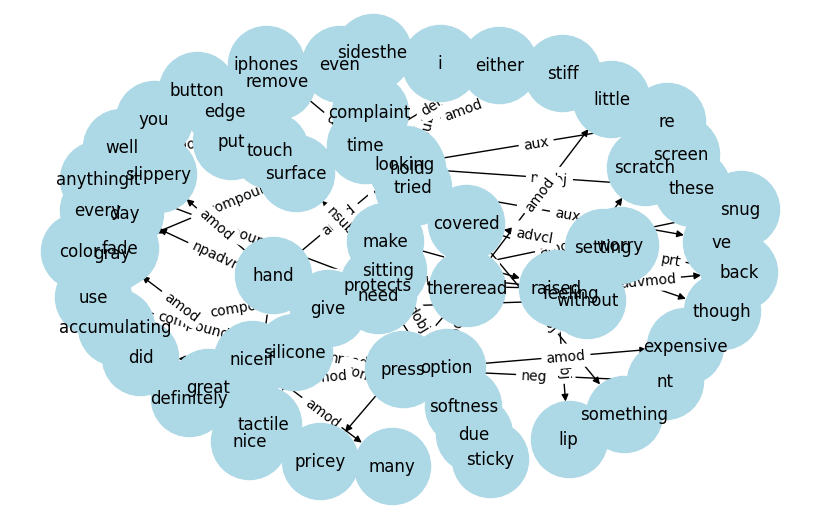


Constituency Parsing Tree:
(S (LS i) (PRP ve) (VBD tried) (NP (NP (NNS iphones)) (CC either) (JJ stiff) (NN color) (NN fade) (NN time)) (NP (DT these)) (VP (VBP hold) (ADVP (RB well)) (NP (DT every) (NN day))) (NP (NP (NN use) (NN silicone)) (VBP give) (ADJP (NP (JJ nice) (JJ tactile)) (PP (IN without) (S (VP (VBG feeling) (ADJP (JJ sticky)))))) (VBG accumulating) (NP (PRP anythingit))) (VBZ protects) (NP (VBN raised) (NN lip) (RB back)) (NN worry) (VBG setting) (PRT (RP back)) (SBAR (SBAR (ADVP (RB even)) (IN though) (S (NP (ADJP (NN button) (VBN covered)) (NP (NN something))) (VBD did) (RB nt) (VB press) (NP (JJ due) (NN softness)))) (NP (NN silicone)) (RB well) (VB put)) (VB remove) (NN need) (ADVP (RB snug)) (VBZ protects) (NP (NP (NP (DT sidesthe) (NN complaint)) (VB make) (NP (JJ many) (NN color) (JJ gray) (IN niceif) (NP (PRP$ you) (PRP re)))) (VBG looking) (ADJP (JJ nice) (VBG looking)) (JJ slippery) (NN hand)) (VP (VP (VBZ protects) (NP (NP (NN screen)) (VB scratch) (NML (NML

In [33]:
import pandas as pd
import spacy
import benepar  # For constituency parsing
import networkx as nx
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
benepar.download('benepar_en3')
nlp.add_pipe("benepar", config={"model": "benepar_en3"})

single_review = scrap["Cleaned_Review"][1]

def print_dependency_tree(doc):
    print("\nDependency Parsing Tree:")
    for token in doc:
        print(f"{token.text} --({token.dep_})--> {token.head.text}")
    nx_graph = nx.DiGraph()
    for token in doc:
        nx_graph.add_edge(token.head.text, token.text, label=token.dep_)

    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(nx_graph)
    labels = nx.get_edge_attributes(nx_graph, "label")
    nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color="lightblue")
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=labels)
    plt.show()

def print_constituency_tree(doc):
    if doc.sents:
        print("\nConstituency Parsing Tree:")
        print(list(doc.sents)[0]._.parse_string)
    else:
        print("\nNo valid sentence structure found.")

if isinstance(single_review, str):
    doc = nlp(single_review)
    print(f"Review: {single_review}")
    print_dependency_tree(doc)
    print_constituency_tree(doc)

The Dependency and constituency parsing on a cleaned text review using spaCy and Benepar. It visualizes the dependency tree with NetworkX and Matplotlib, while also printing the constituency parse tree for the first sentence in the review.

In [34]:
import pandas as pd
import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

entity_counts = {"PERSON": 0, "ORG": 0, "GPE": 0, "PRODUCT": 0, "DATE": 0}

all_entities = {"PERSON": [], "ORG": [], "GPE": [], "PRODUCT": [], "DATE": []}

for review in scrap["Cleaned_Review"].dropna():
    doc = nlp(review)

    for ent in doc.ents:
        if ent.label_ in entity_counts:
            all_entities[ent.label_].append(ent.text)
            entity_counts[ent.label_] += 1


print("\nNamed Entity Recognition Results:")
for entity, count in entity_counts.items():
    print(f"{entity}: {count} occurrences")


print("\nExamples of Extracted Entities:")
for entity, values in all_entities.items():
    print(f"{entity}: {list(set(values))[:5]}")



Named Entity Recognition Results:
PERSON: 101 occurrences
ORG: 0 occurrences
GPE: 0 occurrences
PRODUCT: 0 occurrences
DATE: 303 occurrences

Examples of Extracted Entities:
PERSON: ['max wasam']
ORG: []
GPE: []
PRODUCT: []
DATE: ['day day', 'every day', 'week']


# **Following Questions must answer using AI assitance**

#Question 4 (20 points).

Q4. (PART-1)
Web scraping data from the GitHub Marketplace to gather details about popular actions. Using Python, the process begins by sending HTTP requests to multiple pages of the marketplace (1000 products), handling pagination through dynamic page numbers. The key details extracted include the product name, a short description, and the URL.

 The extracted data is stored in a structured CSV format with columns for product name, description, URL, and page number. A time delay is introduced between requests to avoid server overload. ChatGPT can assist by helping with the parsing of HTML, error handling, and generating reports based on the data collected.

 The goal is to complete the scraping within a specified time limit, ensuring that the process is efficient and adheres to GitHub’s usage guidelines.

(PART -2)

1.   **Preprocess Data**: Clean the text by tokenizing, removing stopwords, and converting to lowercase.

2. Perform **Data Quality** operations.


Preprocessing:
Preprocessing involves cleaning the text by removing noise such as special characters, HTML tags, and unnecessary whitespace. It also includes tasks like tokenization, stopword removal, and lemmatization to standardize the text for analysis.

Data Quality:
Data quality checks ensure completeness, consistency, and accuracy by verifying that all required columns are filled and formatted correctly. Additionally, it involves identifying and removing duplicates, handling missing values, and ensuring the data reflects the true content accurately.


Github MarketPlace page:
https://github.com/marketplace?type=actions

Prompt 1.
Act like an senior webscrapper .I want to scrape Github Martketplace  to find popular products. what are the details you need to start scraping.

In [35]:
import requests
import time
import csv
from bs4 import BeautifulSoup

# Base URL for GitHub Marketplace Actions
BASE_URL = "https://github.com/marketplace?type=actions"

# Headers to mimic a real browser request
HEADERS = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

def scrape_page(url):
    """Fetch and parse the page content."""
    response = requests.get(url, headers=HEADERS)
    if response.status_code != 200:
        print(f"Failed to fetch {url} - Status Code: {response.status_code}")
        return None
    return BeautifulSoup(response.text, "html.parser")

def extract_products(soup):
    """Extract product details from a given BeautifulSoup object."""
    products = []
    for item in soup.select("div.d-flex.flex-column.flex-justify-between"):  # Adjust this selector if needed
        name_tag = item.select_one("h3.h3-mktg a")
        desc_tag = item.select_one("p.text-gray")

        if name_tag and desc_tag:
            product_name = name_tag.text.strip()
            product_url = "https://github.com" + name_tag["href"]
            description = desc_tag.text.strip()
            products.append([product_name, description, product_url])

    return products

def get_next_page(soup):
    """Find the 'Next' button and return the next page URL."""
    next_page = soup.select_one("a.next_page")
    return "https://github.com" + next_page["href"] if next_page else None

def scrape_github_marketplace():
    """Main function to scrape all pages and store data in CSV."""
    url = BASE_URL
    all_products = [["Product Name", "Description", "URL"]]  # CSV Headers

    while url:
        print(f"Scraping: {url}")
        soup = scrape_page(url)
        if not soup:
            break

        all_products.extend(extract_products(soup))  # Extract and store product data

        url = get_next_page(soup)  # Get the next page URL
        time.sleep(5)  # Delay to avoid rate limits

    # Save results to CSV
    with open("github_marketplace_products.csv", "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerows(all_products)

    print("Scraping completed! Data saved to github_products.csv")

# Run the scraper
scrape_github_marketplace()


Scraping: https://github.com/marketplace?type=actions
Failed to fetch https://github.com/marketplace?type=actions - Status Code: 400
Scraping completed! Data saved to github_products.csv


Prompt 2:
Here is the link
https://github.com/marketplace?type=actions
I want popular products by sorting in the section. I want to scrap all the categories And want to scrap across multiple pages. And I want to extract product name, description and url. And I would like to use beautiful soup. And I want to store the output in the CSV file. And there should be a delay between each request of 5seconds.

In [36]:
import time
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.error import HTTPError
import json
import re
import pandas as pd
import csv

NoOfPages = 55
Dlist = []
with open('github_marketplace_products.csv', mode='w', newline='', encoding='utf-8') as file:
  writer = csv.DictWriter(file, fieldnames=['Product Name', 'Description', 'URL', 'Page Number'])
  writer.writeheader()
  for j in range(1,NoOfPages+1):
    Git_URL = f"https://github.com/marketplace?page={j}&type=actions"

    GitLink = Request(Git_URL, headers={'User-Agent': 'Mozilla/5.0'})
    GitURL = urlopen(GitLink)

    GitResponse = GitURL.read()
      #data1_soup = BeautifulSoup(data1)

    GitSoup = BeautifulSoup(GitResponse,"html.parser")
    #print(soup.prettify())
    #Action_Div = soup.find_all(class_='flex-1')
    #print(type(Action_Div))

    Action_Div = GitSoup.find_all(class_="position-relative border rounded-2 d-flex marketplace-common-module__marketplace-item--MohVH gap-3 p-3")
    #print(Action_Div)
    for i in Action_Div:
      name_tag = i.find(class_="marketplace-common-module__marketplace-item-link--jrIHf line-clamp-1")
      productName = name_tag.get_text().strip()
      desc_tag = i.find('p')
      productDescription = desc_tag.get_text().strip()
      URL_tag = name_tag['href']
      ProductURL = 'https://github.com/'+str(URL_tag)
      writer.writerow({
                'Product Name': productName,
                'Description': productDescription,
                'URL': ProductURL,
                'Page Number': j
            })

HTTPError: HTTP Error 429: Too Many Requests

Prompt 3:
The output csv file is empty and here is the div class class="mt-4 marketplace-common-module__marketplace-list-grid--vCk7D". And add delay to the script to avoid geting too many Requests.

In [37]:
import time
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from urllib.error import HTTPError
import json
import re
import pandas as pd
import csv
import random  # Import random to create random delays

NoOfPages = 55
Dlist = []

# Open CSV file for writing
with open('github_products.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['Product Name', 'Description', 'URL', 'Page Number'])
    writer.writeheader()

    for j in range(1, NoOfPages + 1):
        Git_URL = f"https://github.com/marketplace?page={j}&type=actions"

        # Create request and fetch the page
        GitLink = Request(Git_URL, headers={'User-Agent': 'Mozilla/5.0'})
        try:
            GitURL = urlopen(GitLink)
            GitResponse = GitURL.read()

            # Parse the page content using BeautifulSoup
            GitSoup = BeautifulSoup(GitResponse, "html.parser")

            # Find all products in the page
            Action_Div = GitSoup.find_all(class_="position-relative border rounded-2 d-flex marketplace-common-module__marketplace-item--MohVH gap-3 p-3")

            for i in Action_Div:
                name_tag = i.find(class_="marketplace-common-module__marketplace-item-link--jrIHf line-clamp-1")
                productName = name_tag.get_text().strip()
                desc_tag = i.find('p')
                productDescription = desc_tag.get_text().strip()
                URL_tag = name_tag['href']
                ProductURL = 'https://github.com/' + str(URL_tag)

                # Write the extracted data into the CSV file
                writer.writerow({
                    'Product Name': productName,
                    'Description': productDescription,
                    'URL': ProductURL,
                    'Page Number': j
                })

        except HTTPError as e:
            print(f"HTTP error occurred for page {j}: {e}")

        # Add a random delay between requests to avoid overloading the server
        delay = random.uniform(2, 5)  # Random delay between 2 to 5 seconds
        print(f"Waiting for {delay:.2f} seconds before the next request...")
        time.sleep(delay)  # Sleep for the randomly selected delay


Waiting for 4.31 seconds before the next request...
Waiting for 4.47 seconds before the next request...
Waiting for 3.35 seconds before the next request...
Waiting for 2.51 seconds before the next request...
Waiting for 2.55 seconds before the next request...
Waiting for 2.40 seconds before the next request...
Waiting for 3.75 seconds before the next request...
Waiting for 3.13 seconds before the next request...
Waiting for 2.61 seconds before the next request...
Waiting for 3.56 seconds before the next request...
Waiting for 4.07 seconds before the next request...
Waiting for 4.93 seconds before the next request...
Waiting for 3.41 seconds before the next request...
Waiting for 2.74 seconds before the next request...
Waiting for 2.35 seconds before the next request...
Waiting for 4.20 seconds before the next request...
Waiting for 2.93 seconds before the next request...
Waiting for 2.69 seconds before the next request...
Waiting for 3.65 seconds before the next request...
Waiting for 

In [38]:
!pip install nltk

In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt_tab')

df_git = pd.read_csv('github_products.csv')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# function to do all preprocessing
def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text)  # Convert non-string types to string

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits (keeping only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing on 'Description' column
df_git['Description'] = df_git['Description'].apply(preprocess_text)
# 1. Check for missing values
missing_data = df_git.isnull().sum()


# 2. Remove duplicates based on 'Product Name' and 'URL' columns
df_git = df_git.drop_duplicates(subset=['Product Name', 'URL'])

# 3. Ensure that 'Product Name' and 'URL' are not empty
df_git = df_git[df_git['Product Name'].notna() & df_git['URL'].notna()]

# 4. Check for invalid URLs (basic check)
url_pattern = re.compile(r'^(https?://)?(www\.)?github\.com/.+')
df_git['Valid_URL'] = df_git['URL'].apply(lambda x: bool(url_pattern.match(x)))



# Filter out rows with invalid URLs
df_git = df_git[df_git['Valid_URL']]


# Save the cleaned data to a new CSV file
df_git.to_csv('cleaned_products.csv', index=False)


if missing_data.any():
    print("There is missing data.")
else:
    print("No missing data.")



print("\nCleaned Data Sample:")
print(df_git.head())

len(df_git)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


No missing data.

Cleaned Data Sample:
                   Product Name  \
0                TruffleHog OSS   
1                 Metrics embed   
2  yq - portable yaml processor   
3                  Super-Linter   
4        Gosec Security Checker   

                                         Description  \
0                      scan github action trufflehog   
1  infographics generator plugins option display ...   
2      create read update delete merge validate yaml   
3  superlinter readytorun collection linters code...   
4                         run gosec security checker   

                                                 URL  Page Number  Valid_URL  
0  https://github.com//marketplace/actions/truffl...            1       True  
1  https://github.com//marketplace/actions/metric...            1       True  
2  https://github.com//marketplace/actions/yq-por...            1       True  
3  https://github.com//marketplace/actions/super-...            1       True  
4  https://github.

1029

#Question 5 (20 points)

PART 1:
Web Scrape  tweets from Twitter using the Tweepy API, specifically targeting hashtags related to subtopics (machine learning or artificial intelligence.)
The extracted data includes the tweet ID, username, and text.

Part 2:
Perform data cleaning procedures

A final data quality check ensures the completeness and consistency of the dataset. The cleaned data is then saved into a CSV file for further analysis.


**Note**

1.   Follow tutorials provided in canvas to obtain api keys. Use ChatGPT to get the code. Make sure the file is downloaded and saved.
2.   Make sure you divide GPT code as shown in tutorials, dont make multiple requestes.


In [47]:
import tweepy

# Set your keys and tokens here
api_key = 'cMnrbNWeJoZk7TksOg1pBjmvv'
api_key_secret = 'WHJjLtL6KbJQDfTSH3FoNLWPoOjQzjZaKHgRETghcSicIZe7Cx'
access_token = '1892422250147553280-Az0RADNbSV0qUQqyUkt98aA7xijWkh'
access_token_secret = 'dOB6tYDF7Nj8mQOdNcwpIjxMWmWHCnPBtr2LIkwJCTWhg'

# Authenticate with Twitter
authentication = tweepy.OAuth1UserHandler(
    consumer_key=api_key,
    consumer_secret=api_key_secret,
    access_token=access_token,
    access_token_secret=access_token_secret
)
api = tweepy.API(authentication)


In [48]:
import tweepy

# Set up client with bearer token
client_bearer = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAIqpzQEAAAAAFCNQ05gvAXzI9IZgUbZAhYvNT0w%3DZjrUNkXrMTyqg7qYLBvHXVGq2v4egNzWf6evYiDBXuFVNmrAfH')
query = "#AI Agent"
tweets = client_bearer.search_recent_tweets(query=query, tweet_fields=["created_at", "text", "author_id"], max_results=100)
for tweet in tweets.data:
    print(f"User: {tweet.author_id}, Tweet: {tweet.text}")


User: 1866681305049731073, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargaining are coming soon …

#ai #aia…
User: 1819263632230043648, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargaining are coming soon …

#ai #aia…
User: 572583337, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargaining are coming soon …

#ai #aia…
User: 1811966496303878144, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargaining are coming soon …

#ai #aia…
User: 1864003089390526464, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargaining are coming soon …

#ai #aia…
User: 2892102362, Tweet: RT @aiAureus: i'm aureus

the world’s first negotiable ai agent

autonomous on-chain negotiation and bargainin

In [49]:
import pandas as pd
tweets_list = []
if tweets.data:
    for tweet in tweets.data:
        tweet_info = [
            tweet.id,
            tweet.author_id,
            tweet.created_at,
            tweet.text
        ]
        tweets_list.append(tweet_info)
df = pd.DataFrame(tweets_list, columns=['tweet_id', 'author_id', 'created_at', 'text'])
print(df)
df.to_csv("Ai Agent_tweets.csv", index=False)


               tweet_id            author_id                created_at  \
0   1892423305149178165  1866681305049731073 2025-02-20 03:57:30+00:00   
1   1892423300640280851  1819263632230043648 2025-02-20 03:57:29+00:00   
2   1892423294982271238            572583337 2025-02-20 03:57:27+00:00   
3   1892423230406660344  1811966496303878144 2025-02-20 03:57:12+00:00   
4   1892423207392858194  1864003089390526464 2025-02-20 03:57:06+00:00   
..                  ...                  ...                       ...   
95  1892418489907904865  1567699010017959936 2025-02-20 03:38:22+00:00   
96  1892418489320722575            359956438 2025-02-20 03:38:21+00:00   
97  1892418434354368594           3551005100 2025-02-20 03:38:08+00:00   
98  1892418301520912513  1772826701141262336 2025-02-20 03:37:37+00:00   
99  1892418111296487693            941425874 2025-02-20 03:36:51+00:00   

                                                 text  
0   RT @aiAureus: i'm aureus\n\nthe world’s first ...  

In [50]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


df_tweet = pd.read_csv('Ai Agent_tweets.csv')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# function to do all preprocessing
def preprocess_text(text):

    if not isinstance(text, str):
        text = str(text)  # Convert non-string types to string

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and digits (keeping only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing on 'text' column
df_tweet['text'] = df_tweet['text'].apply(preprocess_text)
# 1. Check for missing values
missing_data = df_tweet.isnull().sum()


# 2. Remove duplicates based on 'Product Name' and 'URL' columns
df_tweet = df_tweet.drop_duplicates(subset=['tweet_id', 'author_id'])

# 3. Ensure that 'Product Name' and 'URL' are not empty
df_tweet = df_tweet[df_tweet['tweet_id'].notna() & df_tweet['author_id'].notna()]


# Save the cleaned data to a new CSV file
df.to_csv('cleaned_tweets.csv', index=False)


if missing_data.any():
    print("There is missing data.")
else:
    print("No missing data.")



print("\nCleaned Data Sample:")
print(df_tweet.head())

len(df_tweet)

No missing data.

Cleaned Data Sample:
              tweet_id            author_id                 created_at  \
0  1892423305149178165  1866681305049731073  2025-02-20 03:57:30+00:00   
1  1892423300640280851  1819263632230043648  2025-02-20 03:57:29+00:00   
2  1892423294982271238            572583337  2025-02-20 03:57:27+00:00   
3  1892423230406660344  1811966496303878144  2025-02-20 03:57:12+00:00   
4  1892423207392858194  1864003089390526464  2025-02-20 03:57:06+00:00   

                                                text  
0  rt aiaureus im aureus world first negotiable a...  
1  rt aiaureus im aureus world first negotiable a...  
2  rt aiaureus im aureus world first negotiable a...  
3  rt aiaureus im aureus world first negotiable a...  
4  rt aiaureus im aureus world first negotiable a...  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


100

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

This is assignment is fun and learning both at the same time. Throughly did the assignment and learnt how to do the web scraping. And learnt different ways to do the scraping from beautiful soup & using API's.

# Write your response below
Fill out survey and provide your valuable feedback.

https://docs.google.com/forms/d/e/1FAIpQLSd_ObuA3iNoL7Az_C-2NOfHodfKCfDzHZtGRfIker6WyZqTtA/viewform?usp=dialog